Imię:
<br>
Nazwisko:

# SSVEP

![](../images/kwadrat.gif)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import aseegg as ag

Dane na dzisiejsze zajęcia znajdują sie w pliku 'dane_ssvep.csv'. Każda kolumna to pomiar wykonany dla jednej osoby. Każdy kolejny wiersz to kolejne próbki. Sygnał próbkowany jest z częstotliwością 256 Hz.

In [2]:
df = pd.read_csv('dane_ssvep.csv',sep=';')
mojeDane = df['Sub07']
czestProb=256

Za XX wstaw swój numer (np. Sub01, Sub02, …, Sub11, itd. — dwie cyfry).

In [3]:
df

,Sub01,Sub02,Sub03,Sub04,Sub05,Sub06,Sub07,Sub08,Sub09,Sub10,Sub11,Sub12,Sub13,Sub14,Sub15
0,-346.043110,-853.837527,7080.351054,802.681932,1398.042840,7811.821772,1804.409830,2231.832245,3684.610739,1778.046834,2261.331266,3609.020761,-324.760177,-741.135621,7197.314898
1,-342.671971,-850.296806,7084.142597,802.676875,1396.620126,7810.909980,1800.890378,2229.919828,3685.344245,1777.762095,2260.320175,3609.017905,-324.658564,-741.021638,7198.615565
2,-346.324873,-853.997448,7081.923407,802.410713,1397.368459,7810.127796,1801.397660,2230.257652,3683.983165,1776.718422,2259.145560,3607.679238,-324.428304,-739.970673,7199.647388
3,-343.678981,-851.588190,7081.797410,800.918550,1395.723514,7808.657054,1801.319662,2230.653442,3682.724715,1775.182003,2258.469904,3607.114229,-322.189808,-738.986956,7201.208089
4,-338.537056,-846.290718,7087.521392,797.936238,1391.455919,7804.880540,1799.825418,2228.718411,3680.044410,1776.351664,2258.630353,3608.113983,-322.305317,-739.747868,7199.655442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6323,-349.856219,-841.980071,7104.452147,757.798559,1386.306101,7845.299039,1808.227842,2233.227494,3687.078297,1788.485698,2261.849833,3624.987669,-326.045872,-706.037245,7217.860112
6324,-348.183655,-841.322791,7104.336274,758.187461,1387.267719,7846.345559,1808.613654,2233.576146,3688.764647,1785.502093,2261.345750,3625.596681,-327.099509,-707.161034,7218.972297
6325,-345.889669,-838.404847,7107.589704,756.433614,1386.371985,7845.471537,1808.450947,2233.415430,3688.521023,1785.340017,2261.133599,3624.770021,-327.357843,-706.598458,7218.615317
6326,-346.613371,-837.382243,7108.774626,757.307201,1388.485179,7846.274036,1810.203561,2232.631657,3684.323104,1785.739479,2260.368539,3624.870973,-326.575369,-704.939327,7219.176906


In [4]:
mojeDane

0       1804.409830
1       1800.890378
2       1801.397660
3       1801.319662
4       1799.825418
           ...     
6323    1808.227842
6324    1808.613654
6325    1808.450947
6326    1810.203561
6327    1810.270408
Name: Sub07, Length: 6328, dtype: float64

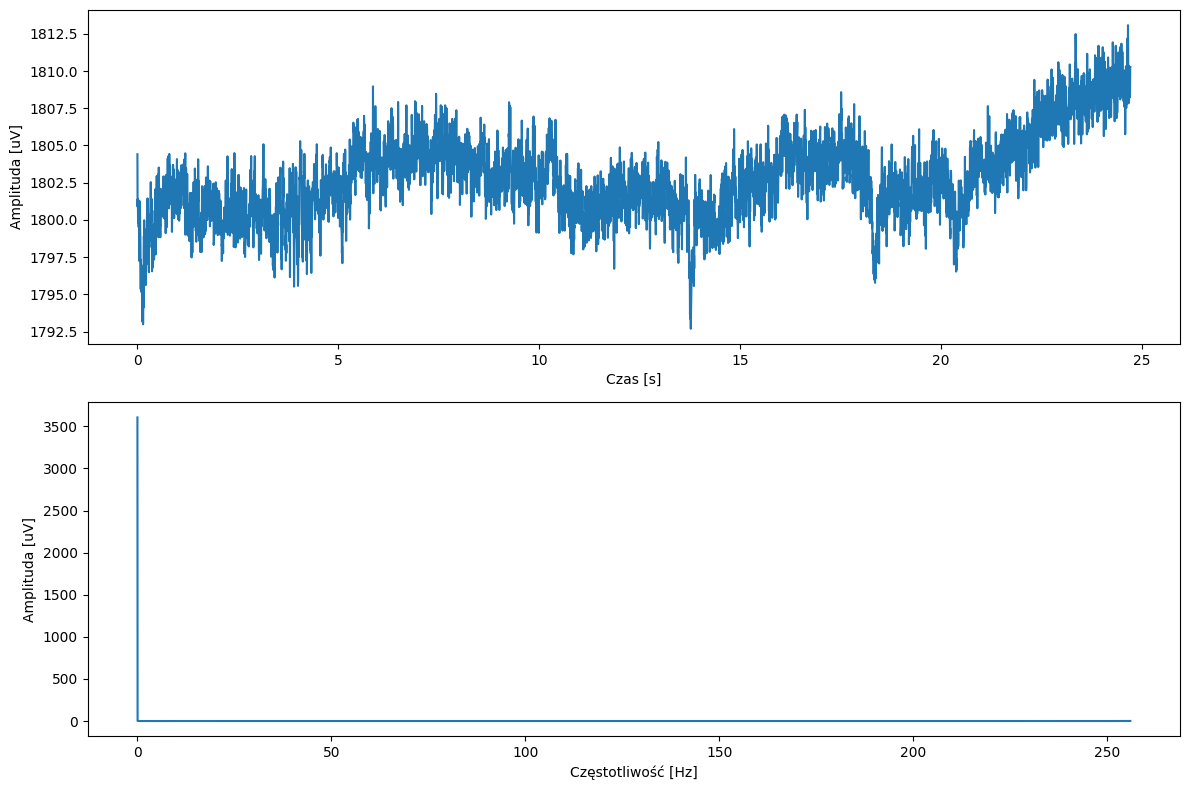

In [19]:
sygnal = np.array(mojeDane)
# f=n/t -> t=n/f
n=6328
t=n/czestProb
czas=np.linspace(0,t,n)
plt.subplot(2, 1, 1)
plt.plot(czas,sygnal)
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda [uV]')
transformata=ag.FFT(sygnal)
freq = np.linspace (0, czestProb, n)
plt.subplot(2, 1, 2)
plt.plot(freq,transformata)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [uV]')
plt.tight_layout()

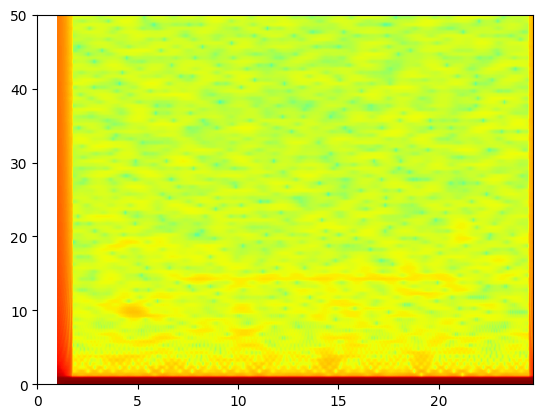

In [6]:
ag.spektrogram(sygnal,256)

###   Zadanie <img src="../images/pencil.png" width="20" align="left">


1. Wybierz kolejny filtr tak, aby usunąć składowe poniżej 3 Hz.
2. Przefiltruj swój sygnał tak, aby usunąć zakłócenia 50 Hz (filtrem pasmowo-zaporowym w paśmie 49-51 Hz).
3. Wyświetl spektrogram w następujący sposób:

In [13]:
przefiltrowanySygnal1=ag.gornoprzepustowy(sygnal,czestProb,3)
przefiltrowanySygnal=ag.pasmowozaporowy(przefiltrowanySygnal1,czestProb,49,51)

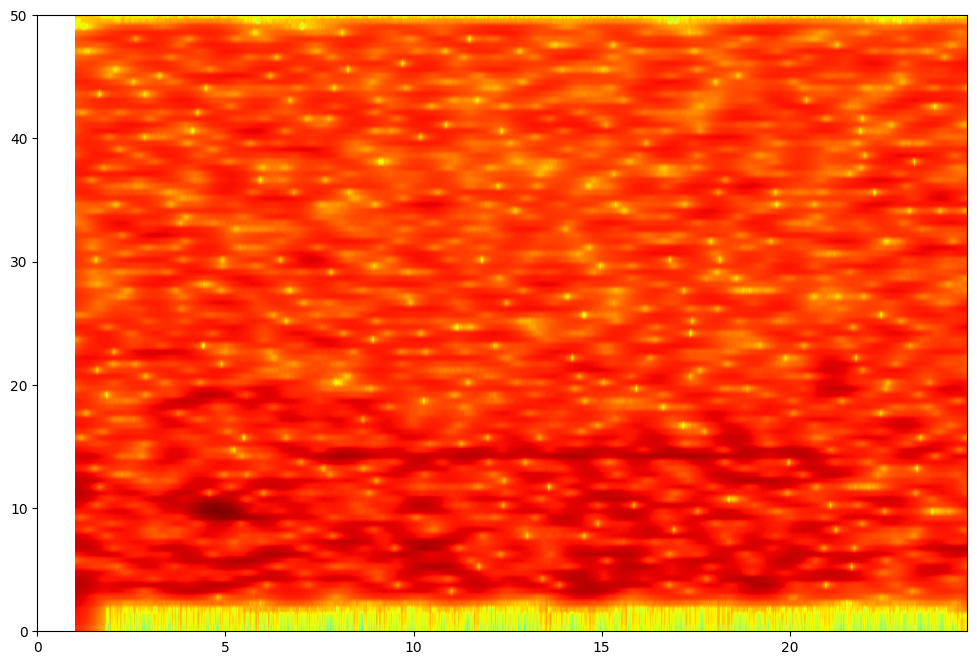

In [14]:
ag.spektrogram(przefiltrowanySygnal, 256)

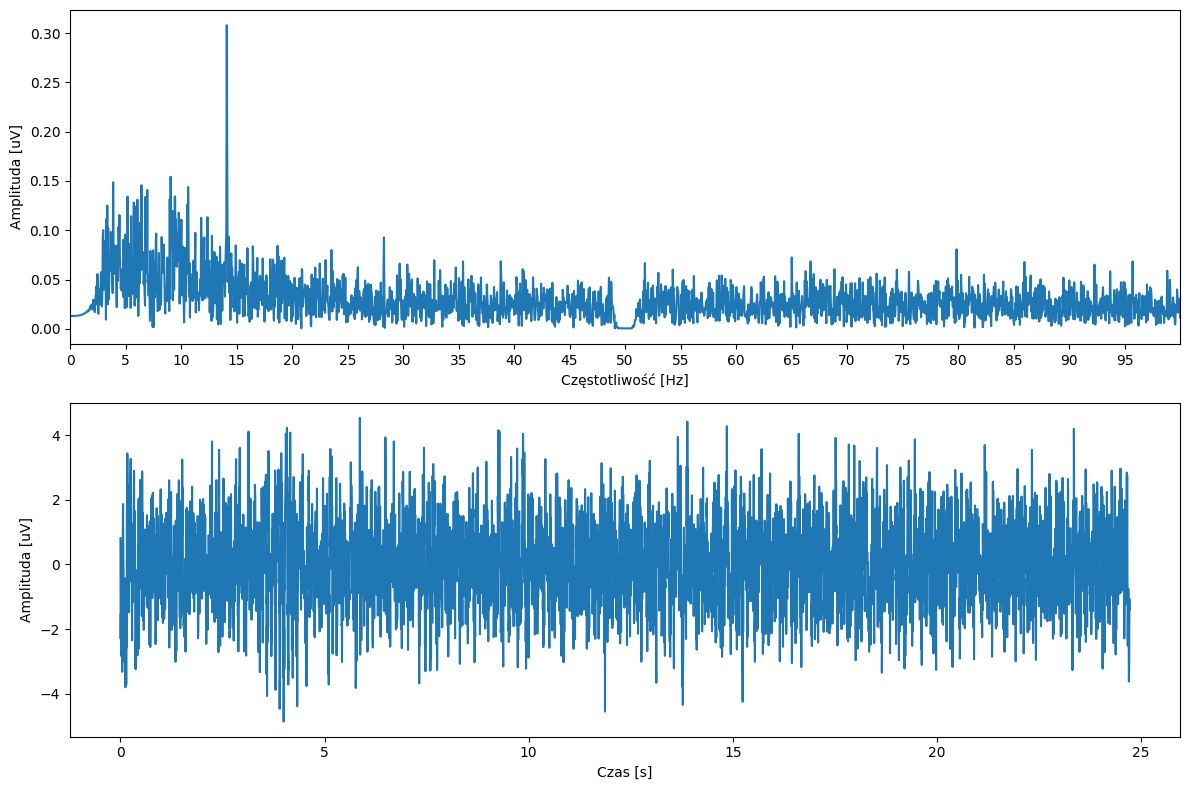

In [28]:
FFT=ag.FFT(przefiltrowanySygnal)
plt.subplot(2, 1, 1)
plt.plot(freq,FFT)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [uV]')
plt.xlim([0,100])
plt.xticks(np.arange(0, 100, 5))
plt.subplot(2, 1, 2)
plt.plot(czas,przefiltrowanySygnal)
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda [uV]')
plt.tight_layout()

In [16]:
# Aby powiększyć wykres w Jupyterze, można użyć funkcji:
plt.rcParams['figure.figsize'] = [12, 8]

Otrzymasz podobny rysunek:

![](../images/spektrogram.png)


Widać na nim, że w pewnym momencie (kolor ciemniejszy) pewne częstotliwości stają się dominujące (ciemno czerwony kolor). Sprawdź, jaka częstotliwość jest dominująca w Twoim sygnale oraz od której do której sekundy pomiaru występuje to zjawisko.

###   Zadanie <img src="../images/pencil.png" width="20" align="left">

### Na jaką częstotliwość patrzyła osoba badana? Od której do której sekundy? Przeanalizuj wykresy w dziedzinie częstotliwości oraz spektrogram. Stwórz wykresy, podpisz osie oraz opisz słownie co przedstawiają. Prześlij arkusz z zajęć do prowadzącego. 

Dla przypomnienia: widmo to inaczej domena częstotliwości a więc wykres amplitudy od częstotliwości.


Osoba badana patrzyła na częstotliwość ~14Hz w czasie między ~7 a ~21 sekundą.

###   Zadanie <img src="../images/pencil.png" width="20" align="left">

### Jak można wykorzystać sygnał SSVEP przy tworzeniu interfejsów?

Poprzez zastosowanie odpowiedniej częstotliwości można zwrócić uwagę użytkownika na pożądany element, sprawdzić preferencje osób poprzez prezentowanie różnych bodźców.

Aby użyć SSVEP, można napisać program który iteracyjnie przechodzi przez dane i wykrywa peak. Wraz ze wzrostem częstotliwości, maleje amplituda, zatem żeby zniwelować ten efekt należałoby lokalnie porównać peak z wartościami wokół (wyciągniętą z nich średnią), by uzyskać wartość względną.